# Pulsar Stars Classification

## Final Project Submission

* Student name: Michael Cheng
* Student pace: self paced 
* Scheduled project review date/time: 9/20/2019 15:00 PT
* Instructor name: Eli Thomas
* Blog post URL: https://cytmike.github.io/machine_learning_pulsar_stars_classification


## Abstract
Pulsar candidates were collected from the High Time Resolution Universe Survey. Pulsars are a type of star, first discovered in 1967. Candidates must be classified into pulsar and non-pulsar classes to aid discovery. Machine learning algorithms are used for classification in this project.

## 1 Introduction

Pulsars are a rare type of Neutron star that produce radio emission detectable here on Earth. They are of considerable scientific interest as probes of space-time, the inter-stellar medium, and states of matter.

As pulsars rotate, their emission beam sweeps across the sky, and when this crosses our line of sight, produces a detectable pattern of broadband radio emission. As pulsars
rotate rapidly, this pattern repeats periodically. Thus pulsar search involves looking for periodic radio signals with large radio telescopes.

Each pulsar produces a slightly different emission pattern, which varies slightly with each rotation. Thus a potential signal detection known as a 'candidate', is averaged over many rotations of the pulsar, as determined by the length of an observation. In the absence of additional info, each candidate could potentially describe a real pulsar. However in practice almost all detections are caused by radio frequency interference (RFI) and noise, making legitimate signals hard to find. 

## 2 Obtaining Data

The data is HTRU2 data set from UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/HTRU2

HTRU2 is a data set which describes a sample of pulsar candidates collected during the High Time Resolution Universe Survey.

For simiplicity, the data contains no positional information or other astronomical details.

It is presented in 2 formats, CSV and ARFF. CSV is used here. The files can be obtained at https://archive.ics.uci.edu/ml/machine-learning-databases/00372/

In [92]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [2]:
df = pd.read_csv('HTRU_2.csv')

In [3]:
df.head()

,140.5625,55.68378214,-0.234571412,-0.699648398,3.199832776,19.11042633,7.975531794,74.24222492,0
0,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
1,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
2,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
3,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
4,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,0


## 3 Data Preprocessing

There is no header in the csv file, so the first row of data is treated as header by pandas. It can be fixed as below.

In [21]:
df = pd.read_csv('HTRU_2.csv', header = None)
df.head()

,0,1,2,3,4,5,6,7,8
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


Column names can be added using attribute information from the readme file. 

In [27]:
df.columns = ["mean_integrated_profile","std_integrated_profile","kurtosis_integrated_profile",
              "skewness_integrated_profile","mean_dm_snr_curve","std_dm_snr_curve",
              "kurtosis_dm_snr_curve","skewness_dm_snr_curve","class"]
df.head()

,mean_integrated_profile,std_integrated_profile,kurtosis_integrated_profile,skewness_integrated_profile,mean_dm_snr_curve,std_dm_snr_curve,kurtosis_dm_snr_curve,skewness_dm_snr_curve,class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [28]:
df.describe()

,mean_integrated_profile,std_integrated_profile,kurtosis_integrated_profile,skewness_integrated_profile,mean_dm_snr_curve,std_dm_snr_curve,kurtosis_dm_snr_curve,skewness_dm_snr_curve,class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1.000000


Every column has 17898 entries.

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
mean_integrated_profile        17898 non-null float64
std_integrated_profile         17898 non-null float64
kurtosis_integrated_profile    17898 non-null float64
skewness_integrated_profile    17898 non-null float64
mean_dm_snr_curve              17898 non-null float64
std_dm_snr_curve               17898 non-null float64
kurtosis_dm_snr_curve          17898 non-null float64
skewness_dm_snr_curve          17898 non-null float64
class                          17898 non-null int64
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


There are no missing values in the data set.

In [30]:
df.isna().sum()

mean_integrated_profile        0
std_integrated_profile         0
kurtosis_integrated_profile    0
skewness_integrated_profile    0
mean_dm_snr_curve              0
std_dm_snr_curve               0
kurtosis_dm_snr_curve          0
skewness_dm_snr_curve          0
class                          0
dtype: int64

## 4 Exploratory Data Analysis

The heatmap is created to analyze the correlation between different variables.

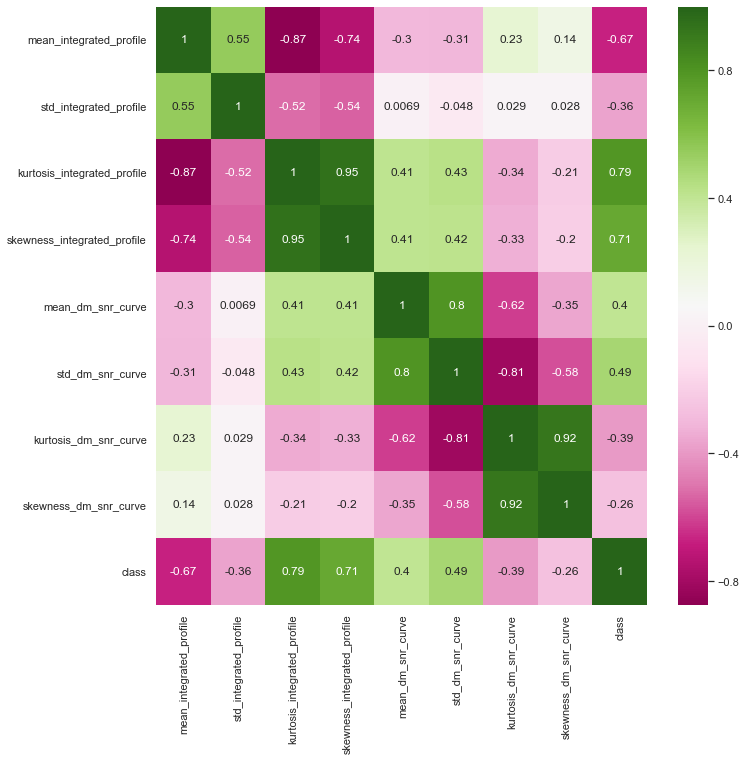

In [48]:
sns.set(rc={'figure.figsize':(11,11)})
sns.heatmap(df.corr(), annot=True, cmap="PiYG");

A few of the variables are highly positive correlated, and some highly negative correlated.

Seaborn contains some useful plot functions for EDA, pair plot and violin plot are used below.

//anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
//anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


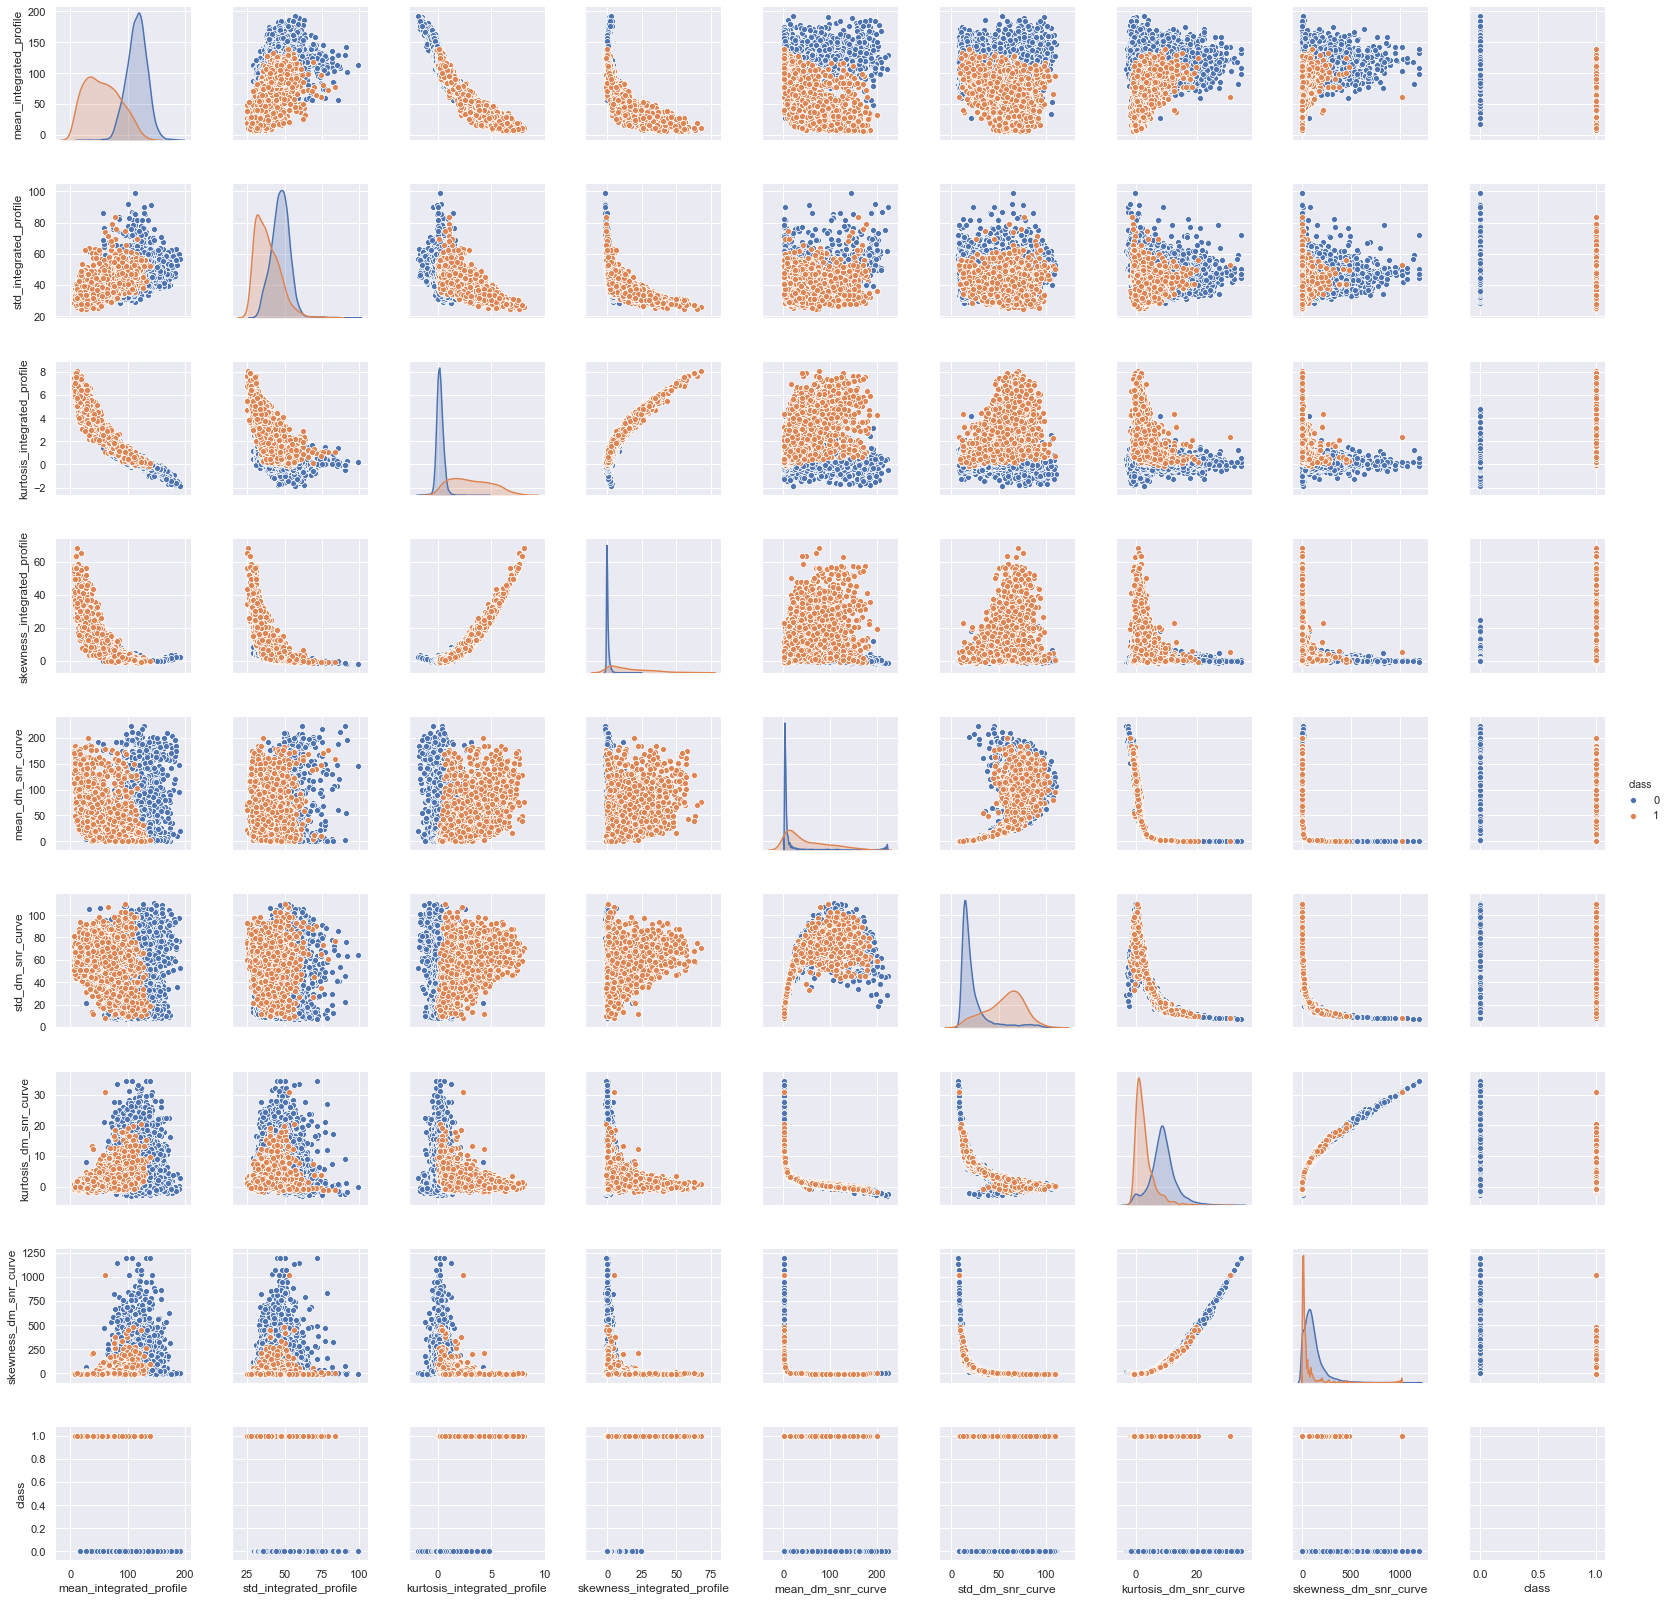

In [50]:
sns.pairplot(df, hue='class')

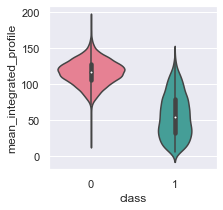

In [80]:
sns.set(rc={'figure.figsize':(3,3)})
sns.violinplot(data=df,y="mean_integrated_profile",x="class",palette="husl");

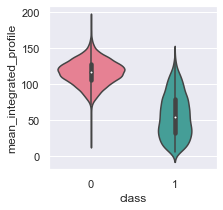

In [66]:
sns.violinplot(data=df,y="mean_integrated_profile",x="class",palette="husl");

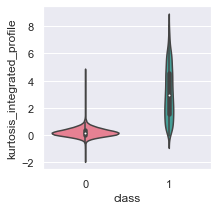

In [67]:
sns.violinplot(data=df,y="kurtosis_integrated_profile",x="class",palette="husl");

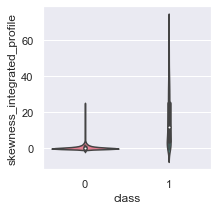

In [68]:
sns.violinplot(data=df,y="skewness_integrated_profile",x="class",palette="husl");

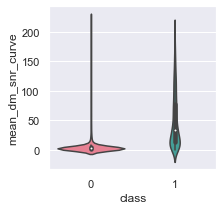

In [69]:
sns.violinplot(data=df,y="mean_dm_snr_curve",x="class",palette="husl");

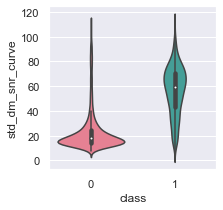

In [70]:
sns.violinplot(data=df,y="std_dm_snr_curve",x="class",palette="husl");

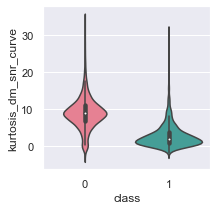

In [71]:
sns.violinplot(data=df,y="kurtosis_dm_snr_curve",x="class",palette="husl");

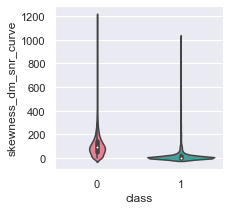

In [72]:
sns.violinplot(data=df,y="skewness_dm_snr_curve",x="class",palette="husl");

The pair plots and violin plots show that the data has different types of distributions nicely that it is good for classifications by machine learning.

In [86]:
y = df['class']
x = df.drop('class', axis = 1)

In [87]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=1)

## 5 Machine Learning Algorithms

6 different machine learning algorithms are used.
* Logistic Regression
* K-nearest Neighbors
* Support Vector Machines
* Adaboost
* Gradient Boosting
* Random Forest

In [135]:
# import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report

### Logistic Regression

In [154]:
lr_model = LogisticRegression()

lr_model.fit(x_train,y_train)

y_lr = lr_model.predict(x_test)

accuracy_score(y_test,y_lr)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9816759776536312

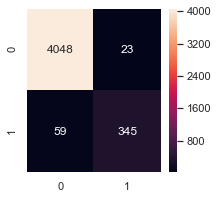

In [127]:
sns.heatmap(confusion_matrix(y_test,y_lr), annot=True, fmt='d');

In [107]:
print(classification_report(y_test,y_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4071
           1       0.94      0.85      0.89       404

    accuracy                           0.98      4475
   macro avg       0.96      0.92      0.94      4475
weighted avg       0.98      0.98      0.98      4475



### K-Nearest Neighbors (KNN)

In [112]:
knn_model = KNeighborsClassifier(n_neighbors=12)

knn_model.fit(x_train,y_train)

y_knn = knn_model.predict(x_test)

accuracy_score(y_test,y_knn)

0.9729608938547486

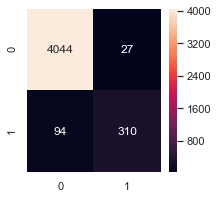

In [126]:
sns.heatmap(confusion_matrix(y_test,y_knn), annot=True, fmt='d');

In [114]:
print(classification_report(y_test,y_knn))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4071
           1       0.92      0.77      0.84       404

    accuracy                           0.97      4475
   macro avg       0.95      0.88      0.91      4475
weighted avg       0.97      0.97      0.97      4475



### Support Vector Machines (SVM)

In [129]:
svm_model = SVC()

svm_model.fit(x_train,y_train)

y_svm = svm_model.predict(x_test)

accuracy_score(y_test,y_svm)

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9115083798882682

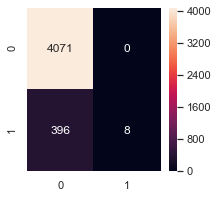

In [130]:
sns.heatmap(confusion_matrix(y_test,y_svm), annot=True, fmt='d');

In [131]:
print(classification_report(y_test,y_svm))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      4071
           1       1.00      0.02      0.04       404

    accuracy                           0.91      4475
   macro avg       0.96      0.51      0.50      4475
weighted avg       0.92      0.91      0.87      4475



### Adaboost

In [153]:
ada_model = AdaBoostClassifier()

ada_model.fit(x_train,y_train)

y_ada = ada_model.predict(x_test)

accuracy_score(y_test,y_ada)

0.9801117318435755

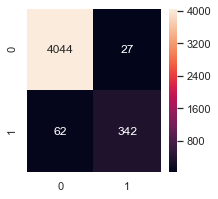

In [136]:
sns.heatmap(confusion_matrix(y_test,y_ada), annot=True, fmt='d');

In [137]:
print(classification_report(y_test,y_ada))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4071
           1       0.93      0.85      0.88       404

    accuracy                           0.98      4475
   macro avg       0.96      0.92      0.94      4475
weighted avg       0.98      0.98      0.98      4475



### Gradient Boosting

In [139]:
gb_model = GradientBoostingClassifier()

gb_model.fit(x_train,y_train)

y_gb = gb_model.predict(x_test)

accuracy_score(y_test,y_gb)

0.9774301675977654

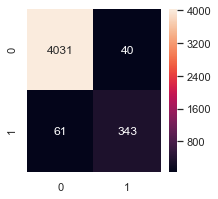

In [140]:
sns.heatmap(confusion_matrix(y_test,y_gb), annot=True, fmt='d');

In [141]:
print(classification_report(y_test,y_gb))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4071
           1       0.90      0.85      0.87       404

    accuracy                           0.98      4475
   macro avg       0.94      0.92      0.93      4475
weighted avg       0.98      0.98      0.98      4475



### Random Forest

In [142]:
rf_model = RandomForestClassifier()

rf_model.fit(x_train,y_train)

y_rf = rf_model.predict(x_test)

accuracy_score(y_test,y_rf)

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9776536312849162

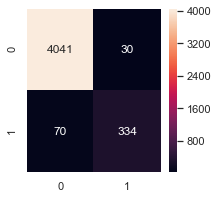

In [143]:
sns.heatmap(confusion_matrix(y_test,y_rf), annot=True, fmt='d');

In [144]:
print(classification_report(y_test,y_rf))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4071
           1       0.92      0.83      0.87       404

    accuracy                           0.98      4475
   macro avg       0.95      0.91      0.93      4475
weighted avg       0.98      0.98      0.98      4475



## 6 Interpretation

All 6 algorithms performed well, with over 91% of accuracy.

Logistic Regression is the best algorithm at 98.16%, while Adaboost comes in second at 98.01%.

The runtime of all the algorithms is less than a minute.

The following is a chart showing the accuracy of the algorithms.

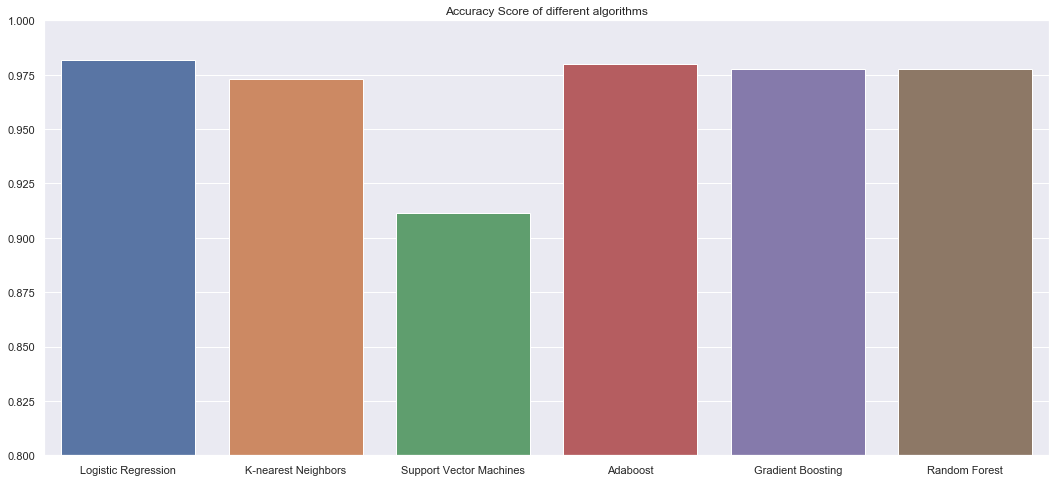

In [176]:
sns.set(rc={'figure.figsize':(18,8)})
algorithms = ["Logistic Regression","K-nearest Neighbors","Support Vector Machines","Adaboost",
              "Gradient Boosting","Random Forest"]
score = [accuracy_score(y_test,y_lr),accuracy_score(y_test,y_knn),accuracy_score(y_test,y_svm),
        accuracy_score(y_test,y_ada),accuracy_score(y_test,y_gb),accuracy_score(y_test,y_rf)]
ax = sns.barplot(x=algorithms,y=score)
ax.set(ylim=(0.8,1))
ax.set_title('Accuracy Score of different algorithms');

## 7 Future Work
* Perform the classification on a more complicated data set, for example the HTRU1 data set with 30 features.
* Try other machine learning algorithms.
* With the use of more computing power, tune different parameters using grid search.

## 8 Summary

With the use of supervised machine learning algorithms, data from radio telescopes can be classfied efficiently into pulsars or non-pulsars. 

Logistic Regression and Adaboost algorithms both have accuracy over 98% using default parameters.

## References

R. J. Lyon, B. W. Stappers, S. Cooper, J. M. Brooke, J. D. Knowles, Fifty Years of Pulsar Candidate Selection: From simple filters to a new principled real-time classification approach, Monthly Notices of the Royal Astronomical Society 459 (1), 1104-1123, DOI: 10.1093/mnras/stw656

R. J. Lyon, HTRU2, DOI: 10.6084/m9.figshare.3080389.v1. 